Descripción general

Este dataset es ampliamente utilizado para problemas de clasificación binaria en el diagnóstico del cáncer de mama.
Contiene características derivadas de imágenes digitales de masas tumorales y clasifica los tumores como benignos (B) o malignos (M).

In [51]:
# Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE


In [52]:
# Cargar el dataset
# URL del archivo CSV en formato raw
url = "https://github.com/JoseMariaPY/proyecto-final-andino-duarte/raw/master/dataset/data.csv"
data = pd.read_csv(url)

# Eliminar columnas no necesarias
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Exploración inicial
print("\nInformación general del dataset:")
print(data.info())
#print(data.describe())

Columnas del dataset

1. id
    Descripción: Identificador único para cada muestra.
    Uso: No tiene relevancia para el análisis; se suele eliminar durante el preprocesamiento.
2. diagnosis
    Descripción: Clasificación del tumor.
    Valores posibles:
    M (Maligno): Indica cáncer.
    B (Benigno): Indica que el tumor no es canceroso.
    Tipo de dato: Categórico.
    Uso: Es la columna objetivo (target) para la clasificación.
    Características numéricas derivadas de imágenes
    
Las siguientes características se calculan a partir de imágenes digitales de células tumorales. Estas características tienen tres versiones:

    Mean: Promedio de la característica.
    SE: Error estándar de la característica.
    Worst: Valor más alto observado.
    Cada una de estas características se divide en las siguientes subcategorías:

Atributos principales:

3. radius_mean, radius_se, radius_worst

    Descripción: El radio promedio, el error estándar y el mayor valor del radio de las células.

    Cálculo: Media de las distancias desde el centro al perímetro.

4. texture_mean, texture_se, texture_worst

    Descripción: Variación en la intensidad de los píxeles en la imagen.

    Cálculo: Basado en la desviación estándar de las intensidades de los píxeles.

5. perimeter_mean, perimeter_se, perimeter_worst

    Descripción: Perímetro promedio, error estándar y mayor valor del perímetro de las células.

    Cálculo: Longitud del borde del núcleo.

6. area_mean, area_se, area_worst

    Descripción: Área promedio, error estándar y mayor valor del área del núcleo de las células.

    Cálculo: Número de píxeles en el núcleo.

7. smoothness_mean, smoothness_se, smoothness_worst

    Descripción: Uniformidad de las superficies celulares.

    Cálculo: Relación entre las diferencias locales en la longitud de los radios.

8. compactness_mean, compactness_se, compactness_worst
    Descripción: Compacidad de las células.

9. concavity_mean, concavity_se, concavity_worst

    Descripción: Grado de concavidad en los contornos celulares (curvatura hacia dentro).

    Cálculo: Mide la extensión de la forma cóncava en los bordes.

10. concave_points_mean, concave_points_se, concave_points_worst

    Descripción: Número de puntos cóncavos en los bordes celulares.

    Cálculo: Cuenta de puntos que forman la curvatura hacia adentro.

11. symmetry_mean, symmetry_se, symmetry_worst

    Descripción: Simetría de las células.

    Cálculo: Diferencias entre lados opuestos del núcleo.

12. fractal_dimension_mean, fractal_dimension_se, fractal_dimension_worst

    Descripción: Dimensión fractal de los bordes celulares, que describe la complejidad.
    
    Cálculo: Relación entre cambios en el detalle y en la escala.

In [ ]:
print("\nRecuento de valores nulos por columna:")
print(data.isnull().sum())

In [ ]:
# Estadísticas descriptivas para todas las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(data.describe())


Distribución de la variable objetivo (diagnosis):
diagnosis
B    357
M    212
Name: count, dtype: int64


C:\Users\i7-11700\AppData\Local\Temp\ipykernel_4752\1381532238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='viridis')


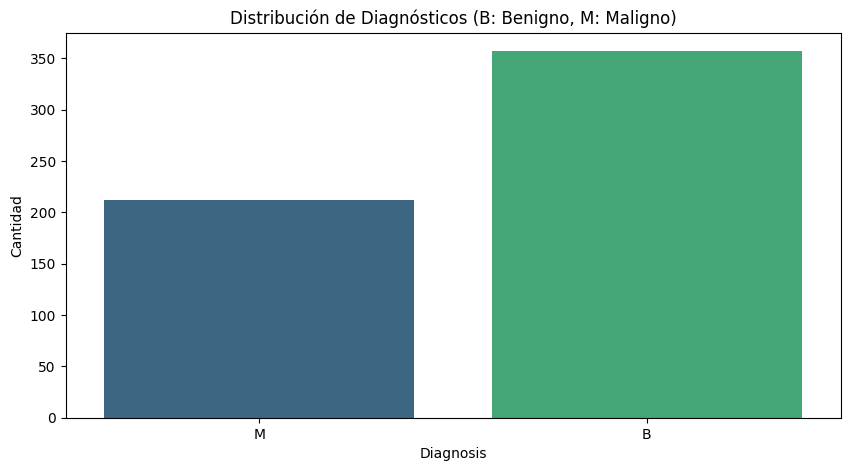

In [57]:
# Verificar los valores únicos y su distribución en la variable objetivo
print("\nDistribución de la variable objetivo (diagnosis):")
print(data["diagnosis"].value_counts())
# Crear un gráfico de barras para la variable objetivo
plt.figure(figsize=(10, 5))
sns.countplot(x='diagnosis', data=data, palette='viridis')
plt.title("Distribución de Diagnósticos (B: Benigno, M: Maligno)")
plt.xlabel("Diagnosis")
plt.ylabel("Cantidad")
plt.show()

**Día 3: Limpieza de Datos, Escalado y Divisiòn**

In [58]:
"""
Mapear M como 1 y B como 0 facilita el uso en algoritmos de aprendizaje supervisado.
"""
# Codificar la variable objetivo
print(data['diagnosis'].unique())
# eliminar espacio en blanco si tiene
data['diagnosis'] = data['diagnosis'].str.strip()
#
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
print('Diagnosiss ', data['diagnosis'].unique())
# Verificar cambios
data.head(5)


['M' 'B']
Diagnosiss  [1 0]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Normalización: Escalamos las características para que todas tengan un rango similar.

In [59]:
"""
Escalar es importante para la regresión logística, ya que las características deben estar en la misma escala para un rendimiento óptimo.
StandardScaler ajusta las características a una distribución con media 0 y desviación estándar 1.
"""
from sklearn.preprocessing import StandardScaler

# Separar características y objetivo
X = data.drop(columns=['diagnosis'])  # Variables predictoras
y = data['diagnosis']  # Variable objetivo

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


División de Dataset (70 % 30%)

In [60]:
"""
Se utiliza train_test_split de sklearn con el parámetro stratify=y para garantizar
que la proporción de clases (maligno y benigno) se mantenga en los conjuntos
 de entrenamiento y prueba.
"""
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
"""
X_train, X_test: Conjuntos de entrenamiento y prueba para las características.
y_train, y_test: Conjuntos de entrenamiento y prueba para la variable objetivo.
stratify=y: Esto asegura que la proporción de clases (maligno y benigno) sea la misma en los conjuntos de entrenamiento y prueba.
"""

# Verificar tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Aplicar SMOTE al conjunto de entrenamiento

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
"""
# SMOTE: Manejo de clases desbalanceadas
SMOTE es una técnica de sobremuestreo que genera nuevas muestras sintéticas para la clase minoritaria.
Esto es útil cuando las clases en el dataset están desbalanceadas (por ejemplo, muchos casos benignos pero pocos malignos). Entrenar un modelo con datos desbalanceados puede llevar a un sesgo hacia la clase mayoritaria.
"""
# Verificar el balance después de aplicar SMOTE
print("Distribución de clases antes de SMOTE:", y_train.value_counts())
print("Distribución de clases después de SMOTE:", pd.Series(y_resampled).value_counts())

"""
Conjunto de entrenamiento (X_train):
    Tamaño: 398 muestras y 30 características.
    Se usa para ajustar (entrenar) el modelo.
Conjunto de prueba (X_test):
    Tamaño: 171 muestras y 30 características.
    Se usa para evaluar el modelo después del entrenamiento.
"""


Tamaño del conjunto de entrenamiento: (398, 30)
Tamaño del conjunto de prueba: (171, 30)
Distribución de clases antes de SMOTE: diagnosis
0    250
1    148
Name: count, dtype: int64
Distribución de clases después de SMOTE: diagnosis
1    250
0    250
Name: count, dtype: int64


'\nConjunto de entrenamiento (X_train):\n    Tamaño: 398 muestras y 30 características.\n    Se usa para ajustar (entrenar) el modelo.\nConjunto de prueba (X_test):\n    Tamaño: 171 muestras y 30 características.\n    Se usa para evaluar el modelo después del entrenamiento.\n'

**Día 4: Identificación de Relaciones**

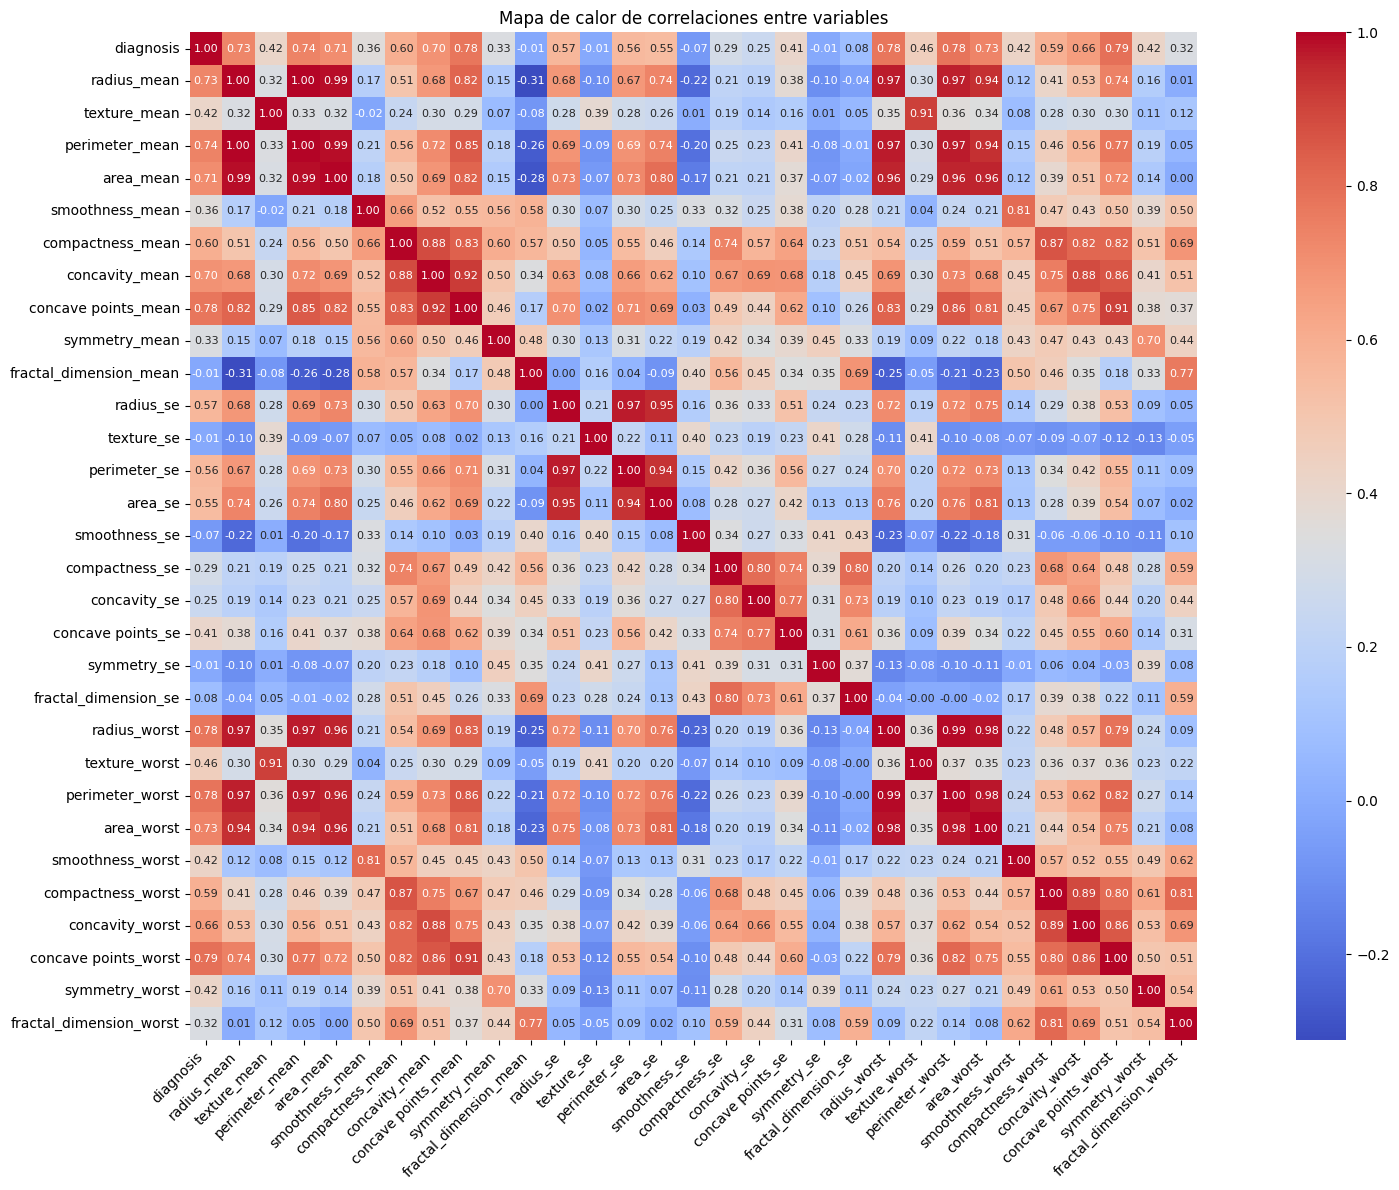


10 variables con mayor correlación con diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


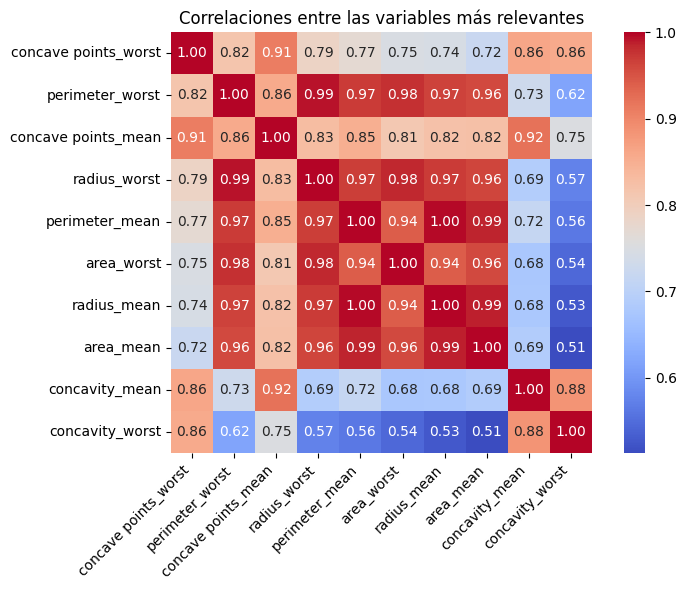

In [61]:
# Crear la matriz de correlación
correlation_matrix = data.corr()

# Generar el heatmap completo (todas las variables)
plt.figure(figsize=(20, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": 8}  # Reducir el tamaño de las anotaciones
)
plt.title("Mapa de calor de correlaciones entre variables")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Seleccionar las 10 variables más correlacionadas con diagnosis
target_correlation = correlation_matrix['diagnosis'].sort_values(ascending=False)
top_features = target_correlation[1:11]  # Excluir 'diagnosis' (correlación consigo misma)

print("\n10 variables con mayor correlación con diagnosis:")
print(top_features)

# Crear un heatmap enfocado en las variables más correlacionadas
plt.figure(figsize=(8, 6))
sns.heatmap(
    data[top_features.index].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": 10}  # Tamaño adecuado para anotaciones
)
plt.title("Correlaciones entre las variables más relevantes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Crear la matriz de correlación
correlation_matrix = data.corr()

# Seleccionar las 10 variables menos correlacionadas con diagnosis
bottom_features = correlation_matrix['diagnosis'].sort_values(ascending=True)[:10]  # Seleccionar las 10 menores

print("\n10 variables con menor correlación con diagnosis:")
print(bottom_features)

# Crear un heatmap enfocado en las variables menos correlacionadas
plt.figure(figsize=(8, 6))
sns.heatmap(
    data[bottom_features.index].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": 10}  # Tamaño adecuado para anotaciones
)
plt.title("Correlaciones entre las variables menos relevantes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Día 5: Entrenamiento del Modelo

Resultados del modelo de regresión logística:
* Accuracy: 0.97
* Precision: 0.98
* Recall: 0.94
* F1-Score: 0.96


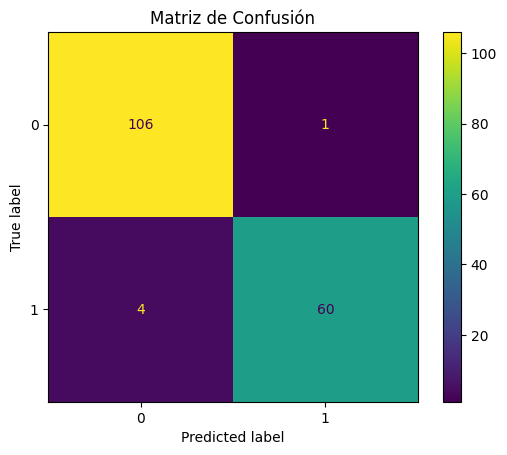

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Entrenar un modelo de regresión logística
# LogisticRegression: Modelo lineal que estima la probabilidad de una variable binaria (diagnosis) basándose en las características de entrada.
model = LogisticRegression(random_state=42, max_iter=1000)
"""
* random_state=42: Fija la semilla para la reproducibilidad de los resultados.
* max_iter=1000: Número máximo de iteraciones para que el modelo converja. Si el modelo no logra encontrar una solución en menos iteraciones, aumenta este valor.
"""
model.fit(X_train, y_train) # Entrena el modelo usando el conjunto de entrenamiento.

# Realizar predicciones
y_pred_proba = model.predict_proba(X_test)[:, 1] # [:, 1]: Extrae la probabilidad de la clase positiva (maligno).
y_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Resultados del modelo de regresión logística:")
print(f"* Accuracy: {accuracy:.2f}")
print(f"* Precision: {precision:.2f}")
print(f"* Recall: {recall:.2f}")
print(f"* F1-Score: {f1:.2f}")

"""
Accuracy (Exactitud):
    Proporción de predicciones correctas (tanto benignos como malignos) sobre el total de instancias.
    En este caso: 97%, lo que indica que el modelo clasifica correctamente la mayoría de los casos.
Precision (Precisión):
    Proporción de predicciones positivas correctas entre todas las predicciones positivas.
    En este caso: 98%, lo que significa que cuando el modelo predice maligno, es correcto el 98% del tiempo.
Recall (Sensibilidad o exhaustividad):
    Proporción de casos positivos identificados correctamente.
    En este caso: 94%, lo que indica que el modelo identifica el 94% de los tumores malignos.
F1-Score:
    Media armónica entre precisión y recall, útil cuando las clases están desbalanceadas.
    En este caso: 96%, lo que demuestra un buen equilibrio entre precisión y recall.
"""

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='viridis')
plt.title("Matriz de Confusión")
plt.show()

Se puede visualizar :
* True Negatives (TN): 106: Estos son los casos que eran realmente negativos (benignos) y que el modelo predijo correctamente como negativos.
* False Positives (FP): 1: Estos son los casos que eran realmente negativos (benignos) pero que el modelo predijo incorrectamente como positivos (malignos).
* False Negatives (FN): 7: Estos son los casos que eran realmente positivos (malignos) pero que el modelo predijo incorrectamente como negativos (benignos).
* True Positives (TP): 57: Estos son los casos que eran realmente positivos (malignos) y que el modelo predijo correctamente como positivos.

Resumen: Esto demuestra que el modelo tiene un excelente rendimiento general, con alta precisión y recall, lo que es crucial en problemas de clasificación médica, donde los falsos negativos (no identificar tumores malignos) tienen consecuencias graves.



**Día 6: Análisis de Desempeño**

Calcular y graficar la curva ROC-AUC
La curva ROC-AUC es una métrica clave para evaluar el desempeño de un modelo en problemas de clasificación binaria.

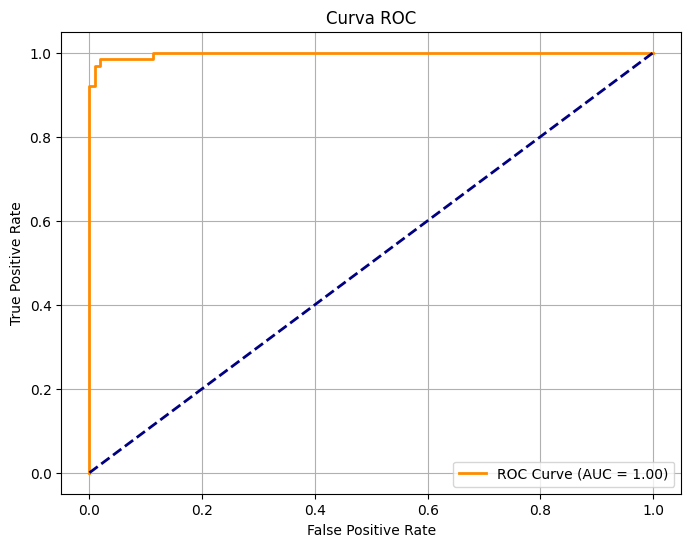

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
"""
roc_curve(y_test, y_pred_proba):
Calcula los valores necesarios para la curva ROC:
* fpr (False Positive Rate): Tasa de falsos positivos, es decir, el porcentaje de casos negativos mal clasificados como positivos.
* tpr (True Positive Rate): Tasa de verdaderos positivos, también conocida como sensibilidad o recall.
* thresholds: Los umbrales usados para clasificar un caso como positivo o negativo. Cambiar estos valores afecta la relación entre fpr y tpr.
"""
roc_auc = roc_auc_score(y_test, y_pred_proba)
"""
roc_auc_score(y_test, y_pred_proba):
Calcula el área bajo la curva ROC (AUC, Area Under the Curve), que es un resumen numérico del desempeño del modelo.
* Un AUC cercano a 1 indica que el modelo clasifica bien.
* Un AUC cercano a 0.5 indica que el modelo no es mejor que el azar.
"""
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange', lw=2)
# Dibuja la curva ROC en el gráfico. Los valores fpr y tpr determinan la forma de la curva.
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", lw=2)
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


* La curva ROC (en naranja) está cerca del vértice superior izquierdo (0, 1), lo que indica un excelente desempeño del modelo.
* Esto significa que el modelo tiene una alta capacidad para discriminar entre las clases positiva y negativa en diversos umbrales.


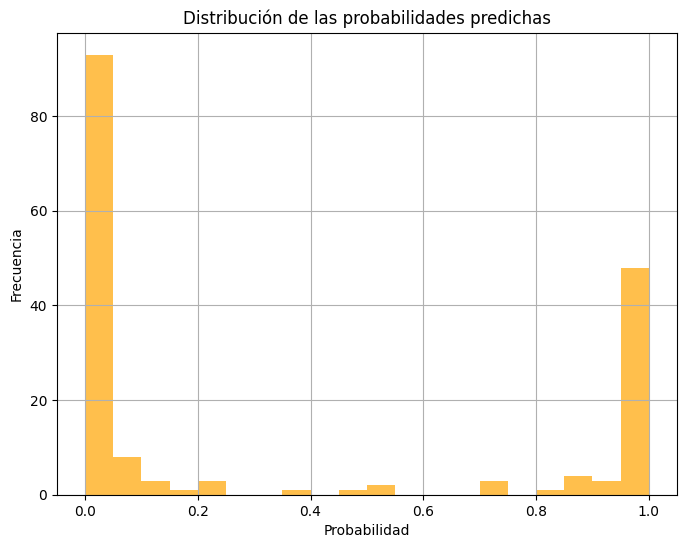

'\n2. Interpretación del Gráfico\nPicos en las Probabilidades:\nCerca de 0:\n    Un gran número de casos tienen una probabilidad cercana a 0.\n    Estos son casos que el modelo clasifica con alta confianza como negativos (por ejemplo, benigno).\nCerca de 1:\n    Otro grupo de casos tiene una probabilidad cercana a 1.\n    Estos son casos que el modelo clasifica con alta confianza como positivos (por ejemplo, maligno).\nProbabilidades Intermedias:\n    Hay muy pocos casos con probabilidades entre 0.2 y 0.8.\n    Esto sugiere que el modelo predice con alta confianza (cercano a 0 o 1) en la mayoría de los casos.\n\nDecisiones del Modelo:\n* Los picos cerca de 0 y 1 indican que el modelo tiene una capacidad fuerte de diferenciar entre clases.\n* La baja cantidad de casos con probabilidades intermedias (duda) muestra que el modelo no es ambiguo en sus predicciones.\n'

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba, bins=20, color='orange', alpha=0.7)
plt.title("Distribución de las probabilidades predichas")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

"""
2. Interpretación del Gráfico
Picos en las Probabilidades:
Cerca de 0:
    Un gran número de casos tienen una probabilidad cercana a 0.
    Estos son casos que el modelo clasifica con alta confianza como negativos (por ejemplo, benigno).
Cerca de 1:
    Otro grupo de casos tiene una probabilidad cercana a 1.
    Estos son casos que el modelo clasifica con alta confianza como positivos (por ejemplo, maligno).
Probabilidades Intermedias:
    Hay muy pocos casos con probabilidades entre 0.2 y 0.8.
    Esto sugiere que el modelo predice con alta confianza (cercano a 0 o 1) en la mayoría de los casos.

Decisiones del Modelo:
* Los picos cerca de 0 y 1 indican que el modelo tiene una capacidad fuerte de diferenciar entre clases.
* La baja cantidad de casos con probabilidades intermedias (duda) muestra que el modelo no es ambiguo en sus predicciones.
"""

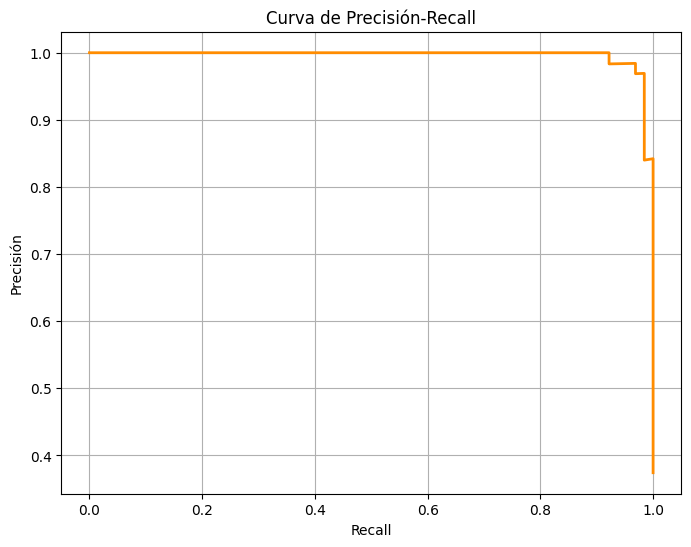

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.title("Curva de Precisión-Recall")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()

Buen rendimiento del modelo:

Precision ≈ 1: Esto indica que casi todas las predicciones positivas del modelo son correctas. Es decir, hay muy pocos falsos positivos.

Recall ≈ 1: Esto indica que el modelo identifica casi todos los casos positivos. Es decir, hay muy pocos falsos negativos.

ROC-AUC ≈ 1: La curva ROC se aproxima a la esquina superior izquierda, lo cual representa un modelo que clasifica perfectamente las clases.

Día 7: Ajuste de Hiperparámetros

In [23]:
# Resultados del modelo inicial (ya calculados)
print("Resultados del modelo inicial:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
# Implementar GridSearchCV para optimización
from sklearn.model_selection import GridSearchCV
# Definir hiperparámetros a optimizar
param_grid = {
    'penalty': ['l1', 'l2'],              
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
# Crear el GridSearchCV # Puedes usar otras métricas como 'roc_auc'
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid,
    scoring='f1',  
    cv=5,
    verbose=1,
    n_jobs=-1
)
# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Mostrar los mejores hiperparámetros
print("\nMejores hiperparámetros encontrados:", grid_search.best_params_)
# Evaluar el modelo optimizado
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
y_pred_proba_optimized = best_model.predict_proba(X_test)[:, 1]
# Calcular métricas del modelo optimizado
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)
print("\nResultados del modelo optimizado:")
print(f"Accuracy: {accuracy_optimized:.2f}")
print(f"Precision: {precision_optimized:.2f}")
print(f"Recall: {recall_optimized:.2f}")
print(f"F1-Score: {f1_optimized:.2f}")


Resultados del modelo inicial:
Accuracy: 0.97
Precision: 0.98
Recall: 0.94
F1-Score: 0.96
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Mejores hiperparámetros encontrados: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Resultados del modelo optimizado:
Accuracy: 0.98
Precision: 0.98
Recall: 0.95
F1-Score: 0.97


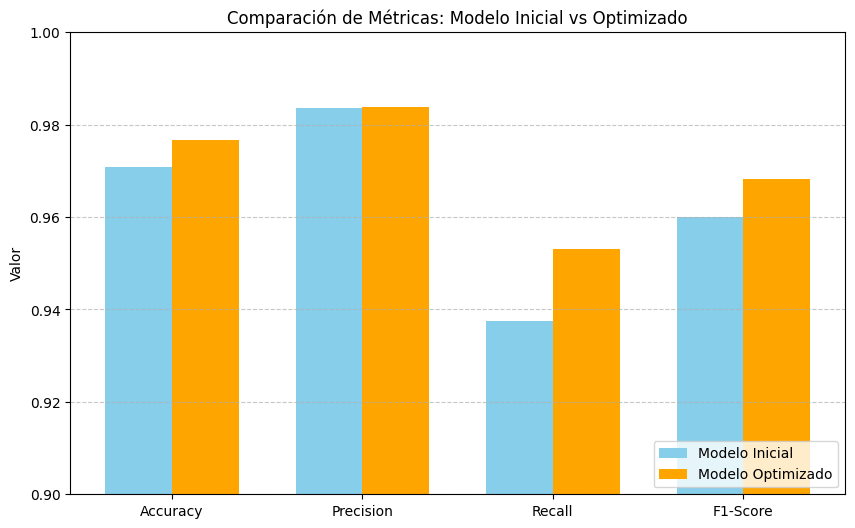

In [22]:
"""
metricas de ambos modelos para comparar en un gráfico de barras.
"""
# Métricas del modelo inicial
metrics_initial = [accuracy, precision, recall, f1]
# Métricas del modelo optimizado
metrics_optimized = [accuracy_optimized, precision_optimized, recall_optimized, f1_optimized]
# Nombres de las métricas
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Crear el gráfico de barras
x = np.arange(len(metric_names))
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, metrics_initial, width, label='Modelo Inicial', color='skyblue')
plt.bar(x + width/2, metrics_optimized, width, label='Modelo Optimizado', color='orange')

# Añadir etiquetas y leyenda
plt.title('Comparación de Métricas: Modelo Inicial vs Optimizado')
plt.xticks(x, metric_names)
plt.ylabel('Valor')
plt.ylim(0.9, 1.0)  # Escalar para mayor detalle
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


Resultados:
* El ajuste de hiperparámetros usando GridSearchCV logró un pequeño pero significativo aumento en las métricas, especialmente en el Recall y F1-Score.
* Esto indica que el modelo optimizado tiene un mejor desempeño general al identificar correctamente los positivos sin comprometer demasiado la precisión.

Entrenar un Modelo con las Variables Seleccionadas o mas correlacionadas (top_features)

In [64]:
# Extraer las 10 columnas más correlacionadas
X_top = data[top_features.index]  # Variables más correlacionadas
y = data['diagnosis']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42, stratify=y)


In [65]:
# ENTRENANDO EL MODELO
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.95
Precision: 0.98
Recall: 0.89
F1-Score: 0.93


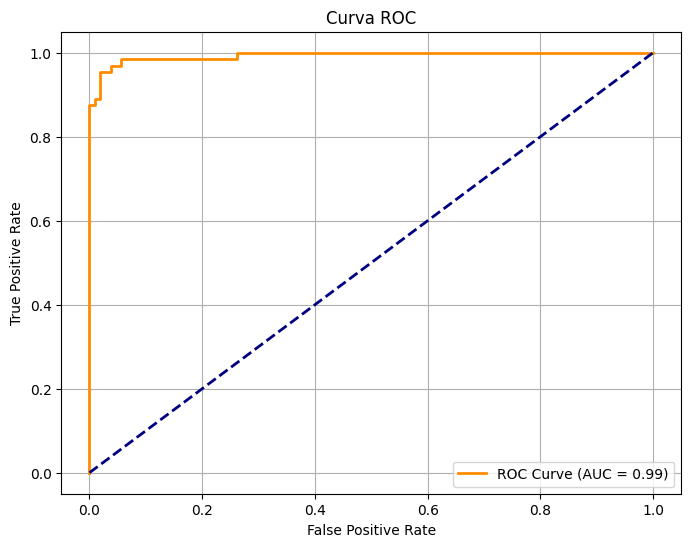

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Calcular y graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", lw=2)
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Métricas de evaluación:

    Accuracy (Precisión): El modelo clasificó correctamente el 95% de las muestras, lo que indica una alta tasa de aciertos en las predicciones generales.
    Precision (Precisión): Cuando el modelo predijo una clase positiva (benigno o maligno), acertó el 98% de las veces, lo que demuestra su alta capacidad para evitar falsos positivos.
    Recall (Recuperación): El modelo identificó correctamente el 89% de los casos positivos (por ejemplo, los casos malignos), lo que sugiere una buena capacidad para detectar los casos relevantes.
    F1-Score: 0.93 el modelo mantiene un buen balance entre precisión y recall, lo cual es crucial cuando ambas métricas son importantes, como en el caso de la detección de cáncer.

El modelo, utilizando solo las variables más correlacionadas con el diagnóstico, tiene un rendimiento excepcional. 

Esto sugiere que las variables seleccionadas basadas en la correlación son muy relevantes para predecir el diagnóstico de manera confiable.

Analizando el conjunto balanceado con SMOTE 

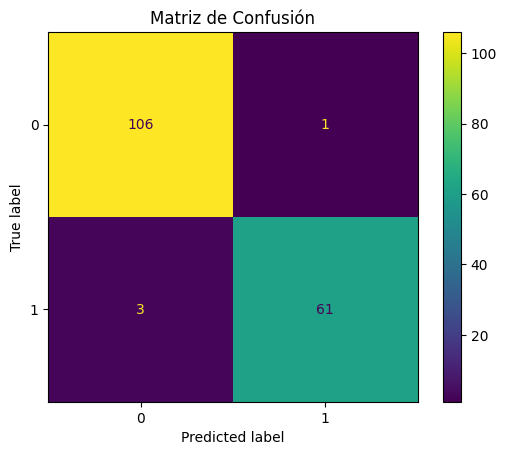

Accuracy: 0.98
Precision: 0.98
Recall: 0.95
F1-Score: 0.97
Matriz de Confusión:
 [[106   1]
 [  3  61]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instanciar el modelo
model = LogisticRegression(random_state=42)

# Entrenar el modelo con el conjunto balanceado
model.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='viridis')
plt.title("Matriz de Confusión")
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



La matriz de confusión nos dice lo siguiente:

*   106 Verdaderos Negativos (TN): El modelo predijo correctamente "negativo" (benigno) en 106 casos.
*   1 Falso Positivo (FP): El modelo predijo "positivo" (maligno) incorrectamente en 1 caso.
*   3 Falsos Negativos (FN): El modelo predijo "negativo" (benigno) incorrectamente en 3 casos.
*   61 Verdaderos Positivos (TP): El modelo predijo correctamente "positivo" (maligno) en 61 casos.


ROC-AUC: 0.9964953271028036


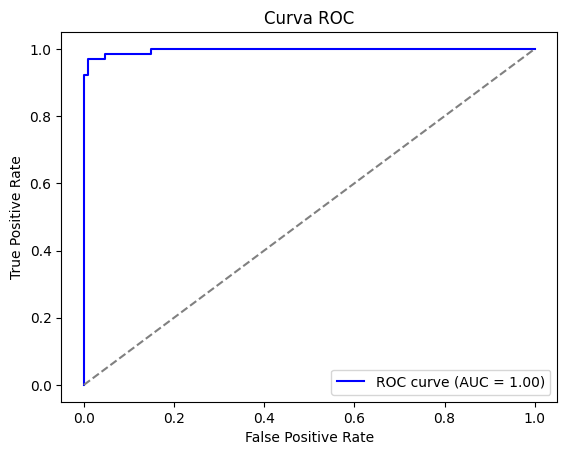

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular probabilidad de predicción para la clase positiva
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
